In [4]:
import os
import sys
from gurobipy import *
import pandas as pd
import numpy as np
import itertools
import datetime
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

module_path = os.path.abspath("..")
sys.path.append(module_path)
from module.modele2 import init_model, init_model2
from module.visualisation2 import (
    visualisation_gantt,
    visualisation_occupation
)
from module.parser import (
    lightning_mcqueen_parser,
    ecriture_donnees_sortie
)
from module.constants import Constantes,Taches

In [5]:
# Charger le fichier Excel

id_file = 3

if id_file == 0:
    file = "mini_instance.xlsx"
elif id_file == 1:    
    file = "instance_WPY_realiste_jalon1.xlsx"
elif id_file == 2:
    file = "instance_WPY_realiste_jalon2.xlsx"
elif id_file == 3:
    file = "instance_WPY_simple.xlsx"
else:
    raise ValueError(f"Erreur : '{id_file}' n'est pas une valeur acceptable. Choisissez parmi 0, 1, 2 et 3.")

(
    temps_min,
    temps_max,
    monday,
    nb_roulements,
    #
    df_sillons_arr,
    df_sillons_dep,
    df_correspondance,
    df_chantiers,
    df_machines,
    df_roulement_agent,
    df_taches_humaines,
    #
    t_a,
    t_d,
    D,
    limites_chantiers,
    limites_machines,
    limites_voies,
    max_agents_sur_roulement,
    equip,
    h_deb,
    nb_cycles_agents,
    nb_cycle_jour,
    comp_arr,
    comp_dep,
    ) = lightning_mcqueen_parser(file)

time_base=Constantes.BASE_TIME

#Initialisation de l'intervalle de temps étudié
t_min=0
t_max=int(temps_max)
#print(t_max//15+1)

# Vérification finale
#print("Vérification du contenu final de t_a :")
#for key, value in t_a.items():
#    print(f"Le train {key} arrive en gare de Woippy au bout de {value} minutes")

#print("Vérification du contenu final de t_d :")
#for key, value in t_d.items():
#    print(f"Le train {key} part de la gare de Woippy au bout de {value} minutes")
#print(D)

temps_min = 0
temps_max = int(temps_max//15+1) #passage en quinzaines de minutes
#print(nb_cycles_agents)
#print(h_deb)

#print(comp(file))


liste_id_train_arrivee=t_a.keys()
liste_id_train_depart=t_d.keys()

7


In [6]:

model,t_arr,t_dep, is_present = init_model(
    liste_id_train_arrivee = liste_id_train_arrivee,
    t_a = t_a,
    liste_id_train_depart = liste_id_train_depart,
    t_d = t_d,
    dict_correspondances = D,
    limites_voies=limites_voies,
    temps_max=temps_max,
    temps_min=temps_min,
    limites_chantiers=limites_chantiers,
    limites_machines=limites_machines,
    nb_cycle_agents=nb_cycles_agents
)


Set parameter Username
Set parameter LicenseID to value 2618972
Academic license - for non-commercial use only - expires 2026-02-06


Contrainte assurant la succession des tâches sur les trains d'arrivée: 100%|██████████| 18/18 [00:00<00:00, 11908.12it/s]
Contrainte assurant la succession des tâches sur les trains de départ: 100%|██████████| 18/18 [00:00<?, ?it/s]
Contrainte assurant la décomposition des heures de début de tâches sur les trains d'arrivée: 100%|██████████| 18/18 [00:00<?, ?it/s]
Contrainte assurant la décomposition des heures de début de tâches sur les trains d'arrivée: 100%|██████████| 18/18 [00:00<00:00, 1367.39it/s]
Contrainte assurant qu'il n'y a qu'un train niveau de la machine DEB: 100%|██████████| 18/18 [00:00<00:00, 1161.54it/s]
Contrainte assurant qu'il n'y a qu'un train niveau des machines FOR et DEG: 100%|██████████| 2/2 [00:00<00:00, 68.21it/s]
Contrainte de fermeture du Chantier FOR: 100%|██████████| 18/18 [00:00<00:00, 1330.91it/s]
Contrainte assurant la succession des tâches entre les chantiers de REC et FOR: 100%|██████████| 18/18 [00:00<?, ?it/s]
Contrainte relative au nombre de voies

In [7]:
model.optimize()

if model.status == GRB.INFEASIBLE:
    print("Le modèle n'a pas de solution")
elif model.status == GRB.UNBOUNDED:
    print("Le modèle est non borné")
else:
    print("Ca marche !")
    for (m, n), var in t_arr.items():
        print(f"Tâche {m} - Train {n} : {var}")
    for (m, n), var in t_dep.items():
        print(f"Tâche {m} - Train {n} : {var}")
    print('La valeur objectif est :', model.objVal)

Ca marche !
Tâche 1 - Train A1_08 : <gurobi.Var t (value 40.0)>
Tâche 1 - Train A3_08 : <gurobi.Var t (value 88.0)>
Tâche 1 - Train A2_08 : <gurobi.Var t (value 46.0)>
Tâche 1 - Train A2_09 : <gurobi.Var t (value 142.0)>
Tâche 1 - Train A3_09 : <gurobi.Var t (value 184.0)>
Tâche 1 - Train A1_09 : <gurobi.Var t (value 136.0)>
Tâche 1 - Train A3_10 : <gurobi.Var t (value 280.0)>
Tâche 1 - Train A1_10 : <gurobi.Var t (value 232.0)>
Tâche 1 - Train A2_10 : <gurobi.Var t (value 238.0)>
Tâche 1 - Train A2_11 : <gurobi.Var t (value 334.0)>
Tâche 1 - Train A1_11 : <gurobi.Var t (value 328.0)>
Tâche 1 - Train A3_11 : <gurobi.Var t (value 376.0)>
Tâche 1 - Train A2_12 : <gurobi.Var t (value 430.0)>
Tâche 1 - Train A3_12 : <gurobi.Var t (value 472.0)>
Tâche 1 - Train A1_12 : <gurobi.Var t (value 424.0)>
Tâche 1 - Train A3_13 : <gurobi.Var t (value 568.0)>
Tâche 1 - Train A4_13 : <gurobi.Var t (value 515.0)>
Tâche 1 - Train A4_14 : <gurobi.Var t (value 611.0)>
Tâche 2 - Train A1_08 : <gurobi.Var t

In [8]:
visualisation_gantt(t_arr,t_dep).show()

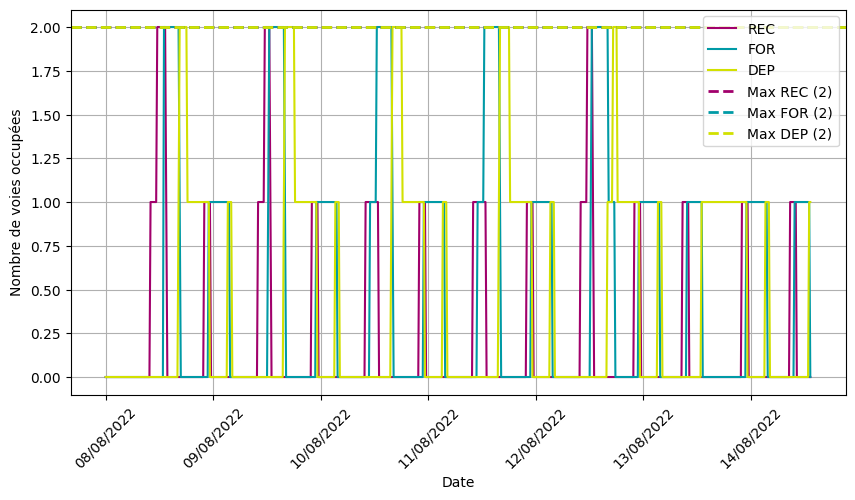

In [9]:
# Correction du format de la date de référence
ref_date = datetime.datetime.strptime("08/08/2022", "%d/%m/%Y")

# Conversion des temps en dates au format "dd/mm/yyyy/HH/MM"
x_date = [ref_date + datetime.timedelta(minutes=15*t) for t in range((t_max-t_min)//15+2)]

# Calcul des voies occupées pour chaque chantier
occupation_REC = np.array([quicksum(is_present['REC'][(id_train, t)].X for id_train in liste_id_train_arrivee).getValue() for t in range((t_max-t_min)//15+2)])
occupation_FOR = np.array([quicksum(is_present['FOR'][(id_train, t)].X for id_train in liste_id_train_depart).getValue() for t in range((t_max-t_min)//15+2)])
occupation_DEP = np.array([quicksum(is_present['DEP'][(id_train, t)].X for id_train in liste_id_train_depart).getValue() for t in range((t_max-t_min)//15+2)])

if visualisation_occupation(occupation_REC, occupation_FOR, occupation_DEP, x_date):
    plt.show()


In [10]:
#Les anciennes variables de décision deviennent les nouvelles données
t_arr = {
        (m, id_train_arr): t_arr[(m, id_train_arr)].X
        for m in Taches.TACHES_ARRIVEE
        for id_train_arr in liste_id_train_arrivee
    }

t_dep = {
        (m, id_train_dep): t_dep[(m, id_train_dep)].X
        for m in Taches.TACHES_DEPART
        for id_train_dep in liste_id_train_depart
    }

In [11]:
model2, who_arr, who_dep, nombre_agents = init_model2(
    liste_id_train_arrivee,
    liste_id_train_depart,
    nb_cycles_agents,
    h_deb,
    nombre_roulements=nb_roulements,
    equip=equip,
    max_agents_sur_roulement=max_agents_sur_roulement,
    comp_arr=comp_arr,
    comp_dep=comp_dep,
    nb_cycle_jour=nb_cycle_jour,
    t_arr=t_arr,
    t_dep=t_dep
)

In [12]:
model2.optimize()

if model2.status == GRB.INFEASIBLE:
    print("Le modèle n'a pas de solution")
elif model2.status == GRB.UNBOUNDED:
    print("Le modèle est non borné")
else:
    print("Ca marche !")
    print('La valeur objectif est :', model2.objVal)

Ca marche !
La valeur objectif est : 39.0


In [13]:
for r in range(1, nb_roulements + 1):
        for q in range(nb_cycles_agents[r] // nb_cycle_jour[r]):
            print("jour", q, "roulement", r, quicksum(
                    [
                        nombre_agents[(r, nb_cycle_jour[r] * q + i)].X
                        for i in range(1, nb_cycle_jour[r] + 1)
                    ]
                )
                , max_agents_sur_roulement[r])

jour 0 roulement 1 1.0 6
jour 1 roulement 1 2.0 6
jour 2 roulement 1 2.0 6
jour 3 roulement 1 2.0 6
jour 4 roulement 1 2.0 6
jour 5 roulement 1 2.0 6
jour 6 roulement 1 1.0 6
jour 7 roulement 1 0.0 6
jour 0 roulement 2 1.0 8
jour 1 roulement 2 2.0 8
jour 2 roulement 2 2.0 8
jour 3 roulement 2 1.0 8
jour 4 roulement 2 2.0 8
jour 5 roulement 2 1.0 8
jour 6 roulement 2 0.0 8
jour 7 roulement 2 0.0 8
jour 0 roulement 3 0.0 2
jour 1 roulement 3 0.0 2
jour 2 roulement 3 0.0 2
jour 3 roulement 3 0.0 2
jour 4 roulement 3 0.0 2
jour 5 roulement 3 0.0 2
jour 6 roulement 3 1.0 2
jour 7 roulement 3 0.0 2
jour 0 roulement 4 1.0 1
jour 1 roulement 4 1.0 1
jour 2 roulement 4 0.0 1
jour 3 roulement 4 0.0 1
jour 4 roulement 4 1.0 1
jour 5 roulement 4 1.0 1
jour 6 roulement 4 0.0 1
jour 0 roulement 5 2.0 7
jour 1 roulement 5 2.0 7
jour 2 roulement 5 2.0 7
jour 3 roulement 5 3.0 7
jour 4 roulement 5 2.0 7
jour 5 roulement 5 1.0 7
jour 6 roulement 5 1.0 7
jour 7 roulement 5 0.0 7


In [ ]:
ecriture_donnees_sortie(
    t_arr, 
    t_dep, 
    occupation_REC, 
    occupation_FOR, 
    occupation_REC, 
    x_date,
    limites_voies,
    h_deb,
    equip,
    nb_cycles_agents,
    who_arr,
    who_dep,
    liste_id_train_arrivee,
    liste_id_train_depart,
    nombre_agents,
    nb_cycle_jour,
    df_roulement_agent,
    df_taches_humaines,
    "sortie_jalon3"
)

8


c:\Users\ggeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\workbook\child.py:99: UserWarning:

Title is more than 31 characters. Some applications may not be able to read the file



{1: 24, 2: 24, 3: 24, 4: 14, 5: 24}
{1: 3, 2: 3, 3: 3, 4: 2, 5: 3}
